<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Takeshi Asahi</em><br>
    <em>Asignatura: Visión Computacional</em><br>

</div>

# **Tarea 4**

*Fecha de Entrega: Lunes 09, Junio 2025.*

**Nombre Estudiante**: Victor Saldivia Vera

1. Proponer mejoras al sistema diseñado e implementado originalmete.

2. Volver a investigar, aplicar y/o ajustar un algoritmo diferente al algoritmo utilizado trabajado en la Tarea 2, o bien una extensión de éste. 

3. Implementar métricas de comparación, por ejemplo precisión o una matriz de confusión, junto con otros indicadores tales como tiempos de ejecución de el procesamiento del dataset. La comparación debiera ser con el algoritmo de la Tarea 2. Si resultó que no fue satisfactorio en esta Tarea 2, implementar más de 1 algoritmo o procedimiento para esta Tarea, de manera de poder realizar la comparación mencionada.

4. Escribir un informe o entregar el notebook con comentarios y documentación, incluyendo el análisis (comentando) de la comparación con los resultados de la Tarea 2. Notar que pudiera ser que el resultado es inferior al de la Tarea 2, lo importante es el comentario o discusión del por qué se mejoró o empeoraron los nuevos resultados.

Tan o más importante que los resultados propiamente tales es la discusión y comentarios acerca de la implementación y los resultados. Como siempre, apoyarse en tablas, gráficos e imágenes.


### **Rúbrica**

**1. Presentación y Estructura del Informe** (25%)
* Muy bueno (5.1 - 7.0): Estructura lógica y clara que facilita la comprensión. Muy buena redacción y ortografía, junto con el y uso correcto de formatos.
* Necesita Mejoras (3.1 - 5.0): Estructura funcional pero mejorable. Orden, redacción y ortografía con imprecisiones menores.
* Deficiente (1.0 - 3.0): Carece de estructura, contenidos desordenados. Redacción y ortografía deficientes que dificultan la comprensión.

**2. Implementación y Comparativa Técnica** (45%)
* Muy bueno (5.1 - 7.0): Implementa exitosamente un algoritmo nuevo o una extensión significativa. Aplica métricas de comparación apropiadas (ej. precisión, accuracy, recall, IoU) y de rendimiento. Presenta resultados comparativos de forma clara con tablas y/o gráficos.
* Necesita Mejoras (3.1 - 5.0): La mejora implementada es mínima. Las métricas de comparación son básicas (ej. solo tiempo) o se aplican sin rigor. La comparación es poco clara o incompleta.
* Deficiente (1.0 - 3.0): No implementa un nuevo algoritmo. No usa métricas de comparación o son irrelevantes. No presenta una comparación explícita de resultados.

**3. Análisis y Discusión de Resultados** (30%)
* Muy bueno (5.1 - 7.0): Incluye un análisis crítico y profundo de la comparación, explicando el porqué de los resultados. Analiza los pros y contras de cada algoritmo (ej. precisión vs. costo computacional) con comentarios bien fundamentados en las comparaciones. Se incluyen comentarios después de las tablas o gráficos, como también una conclusión final.
* Necesita Mejoras (3.1 - 5.0): Análisis superficial que solo describe qué algoritmo fue "mejor", sin explicar las razones técnicas. La discusión de ventajas y desventajas es genérica.
* Deficiente (1.0 - 3.0): Sin análisis comparativo; solo repite datos sin interpretación. No discute las causas del desempeño ni incluye comentarios relevantes.

### **1. Introducción**

En esta Tarea 4 se busca extender y comparar el desempeño de nuevos algoritmos de clasificación de imágenes frente al sistema implementado en la Tarea 2. En la tarea anterior se entrenó una red convolucional básica (``CNN``) desde cero, ahora se propone al menos dos estrategias adicionales: 

- La incorporación de transferencia de aprendizaje mediante un modelo preentrenado (``MobileNetV2``).
- El uso de un clasificador ``SVM`` alimentado con *“features”* extraídas de la ``CNN``. 

El objetivo es medir mejoras o degradaciones en métricas de calidad como: *accuracy*, *precision*, *recall* y *F1-score* y analizar el costo computacional en términos de tiempos de entrenamiento.  

### **2. Metodología**

#### **2.1 Descripción del Dataset**
Para esta tarea se va a utilizar el mismo subconjunto balanceado del dataset **PlantVillage** de la Tarea 2, compuesto por 200 imágenes (100 por clase) ya preprocesadas en la Tarea 1. Las imágenes fueron redimensionadas a 128×128 píxeles y organizadas en dos clases:

- `Tomato_Healthy`
- `Tomato_Early_Blight`

Añadir que en esta etapa se usarán únicamente las imágenes de la carpeta `resized`, ya que mantienen los detalles visuales importantes, a diferencia de la versión suavizada (`filtered`) que podría afectar negativamente el aprendizaje.

#### **2.1 Herramientas Utilizadas**

**Versión de Python**
- 3.10.16

**Otras Herramientas**
- Anaconda
- GitHub
- VS Code

**Fuente del Dataset**
- Kaggle: https://www.kaggle.com/datasets/emmarex/plantdisease 

**Repositorio GitHub de la Tarea N°4**
- Tarea 4: https://github.com/Vikktor93/Tarea4-Introduccion-Vision-Computacional

**Repositorio GitHub de la Tarea N°2 (Tarea Anterior)**
- Tarea 2: https://github.com/Vikktor93/Tarea2-Introduccion-Vision-Computacional

#### **2.2 Preprocesamiento y Data Augmentation**  
Todas las imágenes pasan por un reescalado de píxeles a rango [0,1]. Además, en el generador de datos de entrenamiento se aplica rotaciones aleatorias (±30°), desplazamientos horizontales y verticales (±10%), zooms, cortes tipo ``_shear_`` y volteos horizontales. El objetivo de estas transformaciones buscan enriquecer la variedad de ejemplos y mejorar la capacidad de generalización del modelo ante variaciones geométricas y de iluminación. Este punto anterior, no se trato en la Tarea 2.


### **3. Importación de Librerías**

In [4]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D, Input
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc
)

### **4. Configuración de Parámetros**

Para organizar mejor los parámetros se crea un diccionario ``config`` con todos los parámetros ajustables rutas, tamaño como las de imagen, epochs, learning rate, etc. Así no se instancian las variables dentro de cada función.

In [5]:
config = {
    "ruta": "dataset/resized",     
    "target_size": (224, 224),
    "batch_size": 32,
    "epochs": 20,
    "learning_rate": 1e-4,
    "dropout_rate": 0.5,
    "validation_split": 0.2,
    "shuffle": True,
    "seed": 42
}


### **5. Función de Carga y Preprocesamiento del Dataset**

En la Tarea 2, la sección donde se define y aplica los generadores de datos con Keras, la lógica estaba guardada en variables, pero no se utilizaban funciones. Ahora como optimización del código y para una mejor reutilización, se crea la función def cargar_dataset, que devuelve los dos generadores (``train_generator`` y ``val_generator``) que cargan las imágenes desde un directorio con ``ImageDataGenerator``, reescalan pixeles a [0,1] y aplica data augmentation. De esta forma se devuelve generadores de entrenamiento y validación.


In [6]:
def cargar_dataset(ruta, target_size, batch_size, validation_split, seed):
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=validation_split
    )

    val_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        validation_split=validation_split
    )

    train_generator = datagen.flow_from_directory(
        ruta,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=seed
    )

    val_generator = val_datagen.flow_from_directory(
        ruta,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=seed
    )

    return train_generator, val_generator

### **6. Función para crear modelo CNN**

Se construye una CNN básica con 3 bloques convolucionales + BatchNormalization + relu + MaxPooling, seguido de una capa densa con L2 regularization y Dropout. Se compila con optimizador Adam y loss categorical_crossentropy.



In [7]:
def crear_modelo_cnn(input_shape, num_classes, dropout_rate):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=config["learning_rate"]),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


### **7. Función para crear modelo con Transfer Learning (MobileNetV2)**

En este apartado se crea un modelo basado en ``MobileNetV2`` preentrenado en ImageNet. Se congela sus pesos y se añade un bloque de pooling global + capa densa + Dropout + salida softmax. Esto suele dar mejores resultados en datasets pequeños/medianos, como en el caso de esta tarea.

In [8]:
def crear_modelo_transfer_learning(input_shape, num_classes, dropout_rate, learning_rate):
    # Se carga ek MobileNetV2 sin la capa superior
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Se congela todos los pesos del backbone

    # Construcción de nuevas capas encima
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

 ### **8. Función para entrenar y medir tiempos**

A continuación, se entrena el modelo y mide el tiempo de entrenamiento. Además, devuelve el historial y el tiempo total empleado. Se devuelve el objeto ``History`` y el tiempo en segundos.

In [9]:
def entrenar_modelo(model, train_gen, val_gen, epochs):
    t0 = time.time()
    historial = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        verbose=1
    )
    tiempo_entrenamiento = time.time() - t0
    return historial, tiempo_entrenamiento

 ### **9. Función para evaluar e imprimir métricas**

Se realiza la predicción en el conjunto de validación, se calcula e imprime la matriz de confusión y el *classification report*. Mide también tiempo de inferencia por batch.

In [10]:
def evaluar_modelo(model, val_gen, class_indices):
    # Obtener todas las imágenes y etiquetas verdaderas de validación
    val_gen.reset()
    pasos_validacion = np.ceil(val_gen.samples / val_gen.batch_size)
    t0 = time.time()
    preds_prob = model.predict(val_gen, steps=pasos_validacion, verbose=1)
    tiempo_inferencia = time.time() - t0

    # Convertir probabilidades a etiquetas predichas
    preds = np.argmax(preds_prob, axis=1)
    y_true = val_gen.classes

    # Matriz de confusión
    cm = confusion_matrix(y_true, preds)
    report = classification_report(y_true, preds, target_names=list(class_indices.keys()))

    return cm, report, tiempo_inferencia

### **10. Función para graficar matriz de confusión**

Se dibuja un heatmap de la matriz de confusión utilizando la biblioteca ``seaborn``.

In [11]:
def plot_confusion_matrix(cm, class_names, cmap='Blues'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title('Matriz de Confusión')
    plt.show()

### **11. Funcion para comparar métricas en un DataFrame**

Se crea una función que recibe un diccionario con resultados de los distintos modelos y devuelve un DataFrame. Cada clave del diccionario es el nombre del modelo, y el valor son las métricas.

In [12]:
def crear_dataframe_resultados(resultados_dict):
    filas = []
    for modelo_nombre, met in resultados_dict.items():
        fila = {
            "Modelo": modelo_nombre,
            "Tiempo Entrenamiento (s)": met["tiempo_entrenamiento"],
            "Tiempo Inferencia (s)": met["tiempo_inferencia"],
            "Accuracy": met["accuracy"],
            "F1-score macro": met["f1_macro"]
        }
        filas.append(fila)
    return pd.DataFrame(filas)

### **12. Ejecución Paso a Paso**

Finalmente en la función main se realiza:

- La carga los generadores con ``cargar_dataset``
- Entrenamiento de la ``CNN`` desde cero y du evaluación
- Entrenamiento de la versión con ``Transfer Learning (MobileNetV2)`` y su evaluación
- Se extraen *features* con la ``CNN`` entrenada y entrenar un SVM
- Creación de un DataFrame comparativo

Found 158 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 6.8766 - accuracy: 0.5443 - val_loss: 1.1825 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 8s 1s/step - loss: 2.2971 - accuracy: 0.7468 - val_loss: 1.1658 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 8s 1s/step - loss: 1.1754 - accuracy: 0.8544 - val_loss: 1.1247 - val_accuracy: 0.8421
Epoch 4/20
5/5 [==============================] - 8s 1s/step - loss: 0.7816 - accuracy: 0.9051 - val_loss: 1.1237 - val_accuracy: 0.7368
Epoch 5/20
5/5 [==============================] - 8s 1s/step - loss: 0.7283 - accuracy: 0.9304 - val_loss: 1.1173 - val_accuracy: 0.7632
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.7151 - accuracy: 0.9494 - val_loss: 1.1026 - val_accuracy: 0.7105
Epoch 7/20
5/5 [==============================] - 8s 1s/step - loss: 0.6603 - accuracy: 0.9367 -

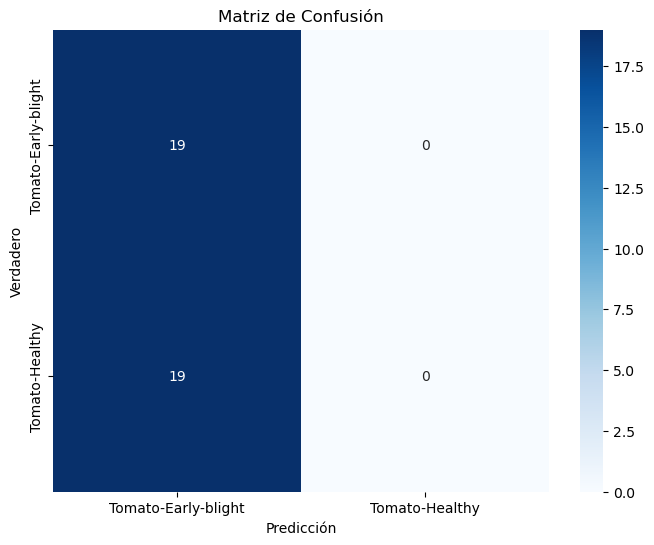

Epoch 1/20
5/5 [==============================] - 11s 1s/step - loss: 1.1952 - accuracy: 0.4304 - val_loss: 0.6700 - val_accuracy: 0.6316
Epoch 2/20
5/5 [==============================] - 4s 855ms/step - loss: 0.9613 - accuracy: 0.5190 - val_loss: 0.5578 - val_accuracy: 0.7632
Epoch 3/20
5/5 [==============================] - 4s 841ms/step - loss: 0.6451 - accuracy: 0.7089 - val_loss: 0.4794 - val_accuracy: 0.7632
Epoch 4/20
5/5 [==============================] - 4s 815ms/step - loss: 0.5302 - accuracy: 0.7089 - val_loss: 0.4396 - val_accuracy: 0.7895
Epoch 5/20
5/5 [==============================] - 4s 820ms/step - loss: 0.5149 - accuracy: 0.7405 - val_loss: 0.3833 - val_accuracy: 0.8684
Epoch 6/20
5/5 [==============================] - 4s 876ms/step - loss: 0.4170 - accuracy: 0.7785 - val_loss: 0.3339 - val_accuracy: 0.8684
Epoch 7/20
5/5 [==============================] - 4s 825ms/step - loss: 0.3995 - accuracy: 0.8354 - val_loss: 0.2947 - val_accuracy: 0.9211
Epoch 8/20
5/5 [======

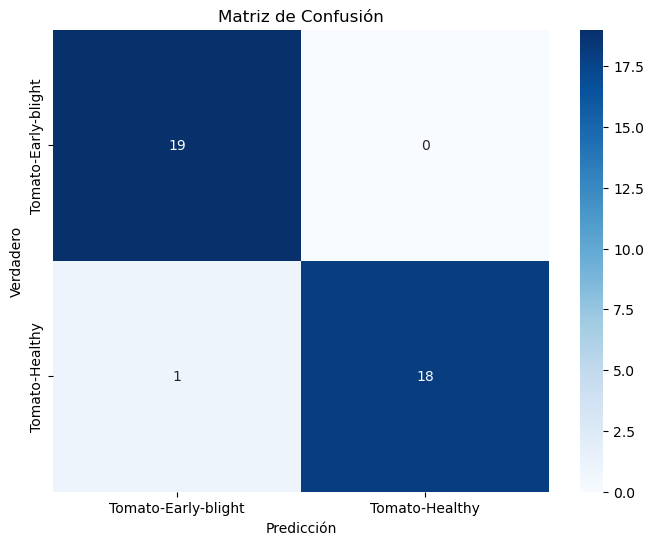

5/5 [==============================] - 3s 682ms/step
=== Classification Report SVM sobre features CNN ===
                     precision    recall  f1-score   support

Tomato-Early-blight       0.00      0.00      0.00        19
     Tomato-Healthy       0.50      1.00      0.67        19

           accuracy                           0.50        38
          macro avg       0.25      0.50      0.33        38
       weighted avg       0.25      0.50      0.33        38



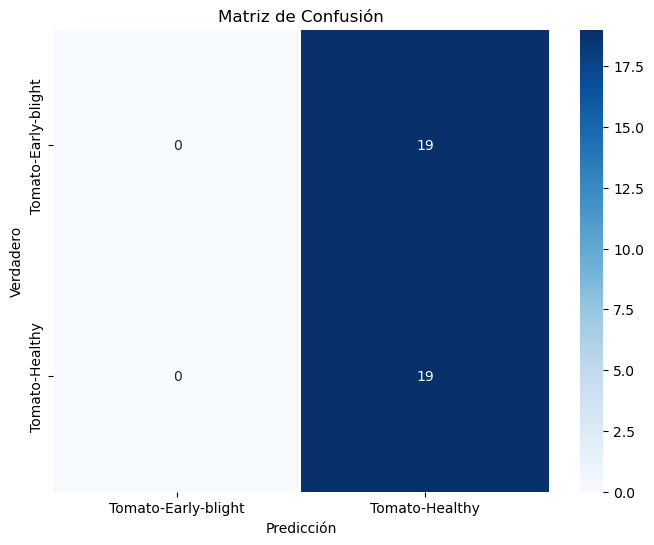

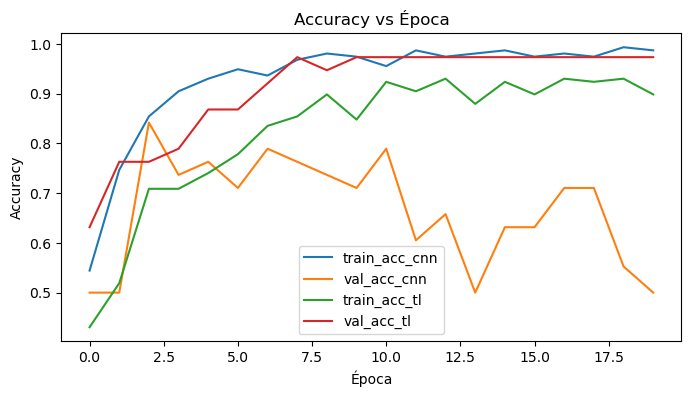

=== Comparativa de resultados ===
              Modelo  Tiempo Entrenamiento (s)  Tiempo Inferencia (s)  \
0           CNN base                162.792415               0.747309   
1  Transfer Learning                 92.573928               1.924093   

   Accuracy F1-score macro  
0  0.500000           None  
1  0.973684           None  


In [39]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Omisión de warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

if __name__ == "__main__":

    # 12.1. Se carga los generadores de datos
    train_gen, val_gen = cargar_dataset(
        ruta=config["ruta"],
        target_size=config["target_size"],
        batch_size=config["batch_size"],
        validation_split=config["validation_split"],
        seed=config["seed"]
    )
    num_classes = len(train_gen.class_indices)
    input_shape = config["target_size"] + (3,)

    # 12.2. Se entrenar CNN desde cero
    modelo_cnn = crear_modelo_cnn(
        input_shape=input_shape,
        num_classes=num_classes,
        dropout_rate=config["dropout_rate"]
    )
    historial_cnn, tiempo_cnn = entrenar_modelo(
        modelo_cnn, train_gen, val_gen, config["epochs"]
    )
    cm_cnn, report_cnn, tiempo_inf_cnn = evaluar_modelo(
        modelo_cnn, val_gen, train_gen.class_indices
    )
    print("=== Classification Report CNN base ===")
    print(report_cnn)
    plot_confusion_matrix(cm_cnn, list(train_gen.class_indices.keys()))

    # 12.3. Se entrena el modelo con Transfer Learning (MobileNetV2)
    modelo_tl = crear_modelo_transfer_learning(
        input_shape=input_shape,
        num_classes=num_classes,
        dropout_rate=config["dropout_rate"],
        learning_rate=config["learning_rate"]
    )
    historial_tl, tiempo_tl = entrenar_modelo(
        modelo_tl, train_gen, val_gen, config["epochs"]
    )
    cm_tl, report_tl, tiempo_inf_tl = evaluar_modelo(
        modelo_tl, val_gen, train_gen.class_indices
    )
    print("=== Classification Report Transfer Learning ===")
    print(report_tl)
    plot_confusion_matrix(cm_tl, list(train_gen.class_indices.keys()))

    # 12.4. Se extrae features y se entrena un SVM
    from sklearn.svm import SVC
    # 12.4.1. Se extrae features (ej: el flatten de modelo_cnn)
    extractor = tf.keras.Model(
        inputs=modelo_cnn.input,
        outputs=modelo_cnn.get_layer(index=-3).output  # Se puede ajustar el índice según la capa Flatten
    )

    # Obtención de todas las imágenes de validación en un array
    val_gen.reset()
    pasos_val = np.ceil(val_gen.samples / val_gen.batch_size)
    X_val = extractor.predict(val_gen, steps=pasos_val, verbose=1)
    y_val = val_gen.classes

    # Extracción de features de entrenamiento
    train_gen.reset()
    pasos_train = np.ceil(train_gen.samples / train_gen.batch_size)
    X_train = extractor.predict(train_gen, steps=pasos_train, verbose=1)
    y_train = train_gen.classes

    # 12.4.2. Entrenamiento SVM
    svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
    t0_svm = time.time()
    svm_clf.fit(X_train, y_train)
    tiempo_svm_train = time.time() - t0_svm

    # 12.4.3. Evaluación de SVM
    t0_svm_inf = time.time()
    y_pred_svm = svm_clf.predict(X_val)
    tiempo_svm_inf = time.time() - t0_svm_inf

    cm_svm = confusion_matrix(y_val, y_pred_svm)
    report_svm = classification_report(y_val, y_pred_svm,
                                       target_names=list(train_gen.class_indices.keys()))
    print("=== Classification Report SVM sobre features CNN ===")
    print(report_svm)
    plot_confusion_matrix(cm_svm, list(train_gen.class_indices.keys()))

    # Curvas de Accuracy vs Época para ambos modelos
    plt.figure(figsize=(8, 4))
    # Accuracy entrenamiento y validación CNN base
    plt.plot(historial_cnn.history["accuracy"], label="train_acc_cnn")
    plt.plot(historial_cnn.history["val_accuracy"], label="val_acc_cnn")

    # Accuracy entrenamiento y validación Transfer Learning
    plt.plot(historial_tl.history["accuracy"], label="train_acc_tl")
    plt.plot(historial_tl.history["val_accuracy"], label="val_acc_tl")
    plt.title("Accuracy vs Época")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
 

    # 12.5. Se crea el DataFrame comparativo de resultados
    resultados = {
        "CNN base": {
            "tiempo_entrenamiento": tiempo_cnn,
            "tiempo_inferencia": tiempo_inf_cnn,
            "accuracy": historial_cnn.history["val_accuracy"][-1],
            "f1_macro": None 
        },
        "Transfer Learning": {
            "tiempo_entrenamiento": tiempo_tl,
            "tiempo_inferencia": tiempo_inf_tl,
            "accuracy": historial_tl.history["val_accuracy"][-1],
            "f1_macro": None  
        }
    }

    df_comparativo = crear_dataframe_resultados(resultados)
    print("=== Comparativa de resultados ===")
    print(df_comparativo)

### **13. Gráficas Adicionales**

#### **Interpretación del histograma de probabilidades**  


El histograma muestra cómo de seguro está el modelo al asignar la etiqueta correcta a cada imagen. Para la clase ``Tomato-Early-blight``, la mayoría de las predicciones se agrupan muy cerca de 1, es decir, hay una alta confianza y uniformidad en el modelo. En cambio, en la clase ``Tomato-Healthy`` se observa una mayor dispersión de probabilidades (desde ~0.3 hasta valores cercanos a 1.0), lo que sugiere que el modelo duda en algunos ejemplos y podría beneficiarse de más datos o de un ajuste de umbrales para minimizar falsos positivos/negativos.

In [ ]:
def plot_histogramas_probabilidades(model, val_gen, class_indices):
    val_gen.reset()
    pasos = int(np.ceil(val_gen.samples / val_gen.batch_size))
    y_prob = model.predict(val_gen, steps=pasos, verbose=0)  # (n_muestras, n_clases)
    y_true = val_gen.classes
    n_clases = len(class_indices)

    # Por cada clase, se filtra las muestras verdaderas y se gráfica los histogramas
    fig, axes = plt.subplots(nrows=1, ncols=n_clases, figsize=(4*n_clases, 4))
    if n_clases == 1:
        axes = [axes]

    inv_class_indices = {v: k for k, v in class_indices.items()}

    for i in range(n_clases):
        probs_de_clase_i = y_prob[y_true == i, i]
        axes[i].hist(probs_de_clase_i, bins=10, range=(0, 1), edgecolor='k')
        axes[i].set_title(f"Hist. Prob. Clase “{inv_class_indices[i]}”")
        axes[i].set_xlabel("Probabilidad predicha")
        axes[i].set_ylabel("Número de ejemplos")
        axes[i].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


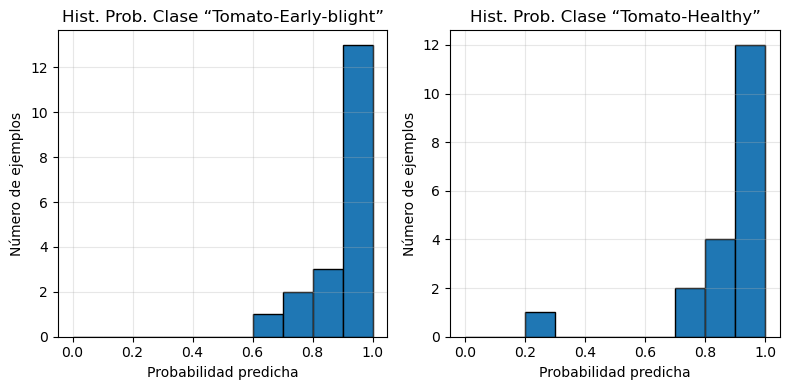

In [41]:
plot_histogramas_probabilidades(modelo_tl, val_gen, train_gen.class_indices)

#### **Curvas de entrenamiento: CNN Base vs Transfer Learning**  


Se añade una gráfica de como evolucionan la *pérdida (loss)* y la métrica de *accuracy* en los conjuntos de entrenamiento y validación a lo largo de las épocas.

De esta forma se sabe cuando el loss de entrenamiento baja pero el loss de validación sube o ambos losses altos, y verifica si el modelo converge correctamente.

In [42]:
def plot_curvas_entrenamiento(historial, etiqueta_modelo="Modelo"):
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(f"Curvas de entrenamiento: {etiqueta_modelo}", fontsize=16)

    # Subplot de Pérdida
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(historial.history["loss"],     label="train_loss")
    ax1.plot(historial.history["val_loss"], label="val_loss")
    ax1.set_title("Pérdida")
    ax1.set_xlabel("Época")
    ax1.set_ylabel("Loss")
    ax1.legend()

    # Subplot de Accuracy
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(historial.history["accuracy"],     label="train_acc")
    ax2.plot(historial.history["val_accuracy"], label="val_acc")
    ax2.set_title("Accuracy")
    ax2.set_xlabel("Época")
    ax2.set_ylabel("Accuracy")
    ax2.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


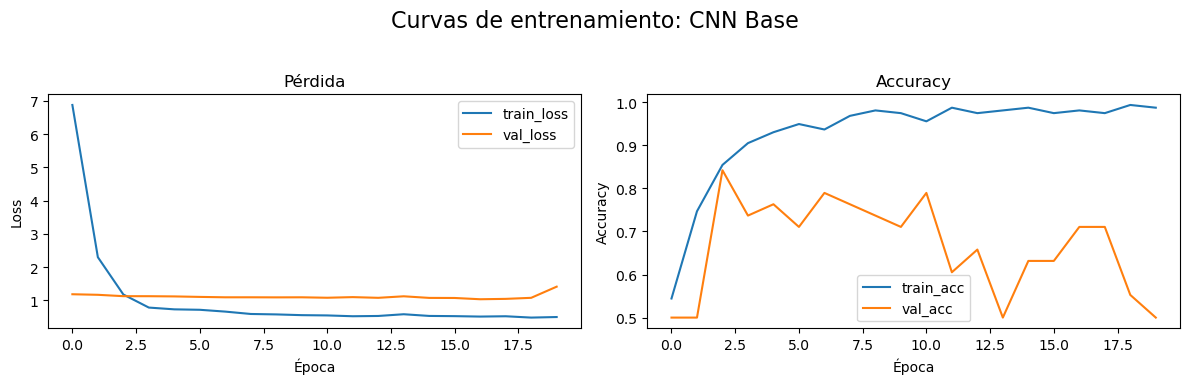

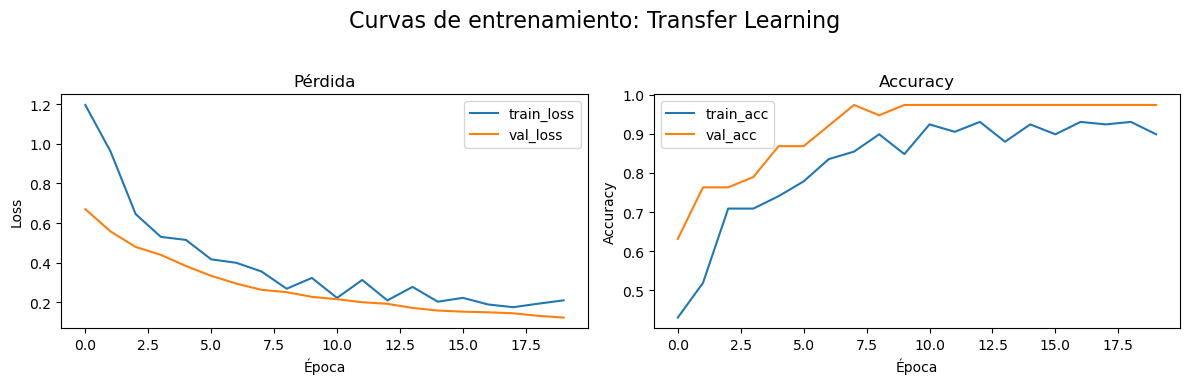

In [43]:
plot_curvas_entrenamiento(historial_cnn, etiqueta_modelo="CNN Base")
plot_curvas_entrenamiento(historial_tl,  etiqueta_modelo="Transfer Learning")


En la gráfica de *“CNN Base”* se observa que la función de pérdida de entrenamiento (`train_loss`) desciende rápidamente de aproximadamente 7 en la época 0 a cerca de 0.6 en la época 19, mientras que la pérdida de validación (`val_loss`) arranca en torno a 1.2, alcanza un mínimo de 0.9 en la época 2 y luego asciende hasta cerca de 1.5 al final. La precisión de entrenamiento (`train_acc`) se incrementa desde 0.55 hasta estabilizarse alrededor de 0.98 entre las épocas 8 y 12, pero la precisión de validación (`val_acc`) permanece baja, fluctua entre 0.50 y 0.80 (con un peak en ~0.80 en la época 8) y cae de nuevo a ~0.50, lo que confirma que el modelo sufre sobreajuste y no generaliza adecuadamente.

Por su parte, en el modelo de *“Transfer Learning”* ambas curvas de pérdida (`train_loss` y `val_loss`) descienden de igual manera, pasando de ~1.2/0.7 en la época 0 a ~0.2/0.15 en la época 19. La precisión de entrenamiento (`train_acc`) asciende de ~0.45 a ~0.95, mientras que la precisión de validación (`val_acc`) sube de ~0.35 a superar 0.97 alrededor de la época 9 y se mantiene cerca de 0.95–0.98. Esto sugiere que la utilización del MobileNetV2 mejora significativamente la capacidad de generalización y evita el sobreajuste observado en la CNN entrenada desde cero.  


### **14. Ejemplo de Predicciones**

En la siguiente figura se muestra 10 imágenes del conjunto de validación (abajo) y la predicción del modelo (arriba). Este análisis cualitativo permite identificar patrones de confusión, por ejemplo: hojas con síntomas leves de *“Early-blight”* que se clasifican como *“Healthy”* y guiar futuros ajustes de umbral o de recolección de muestras adicionales para esas clases.

In [37]:
def mostrar_ejemplos_predicciones(model, val_gen, class_indices, num_imagenes=10):
    val_gen.reset()
    pasos = int(np.ceil(val_gen.samples / val_gen.batch_size))
    y_prob = model.predict(val_gen, steps=pasos, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)
    y_true = val_gen.classes
    rutas = np.array(val_gen.filepaths)

    inv_class = {v: k for k, v in class_indices.items()}

    # Selección de índices aleatorios
    inds = np.random.choice(len(y_true), size=num_imagenes, replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(inds):
        img = load_img(rutas[idx], target_size=config["target_size"])
        arr = img_to_array(img) / 255.0

        ax = plt.subplot(2, 5, i+1)
        ax.imshow(arr)
        ax.axis("off")
        ax.set_title(
            f"Pred: {inv_class[y_pred[idx]]}\nTrue: {inv_class[y_true[idx]]}",
            fontsize=10
        )

    plt.suptitle("Ejemplos de predicciones", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

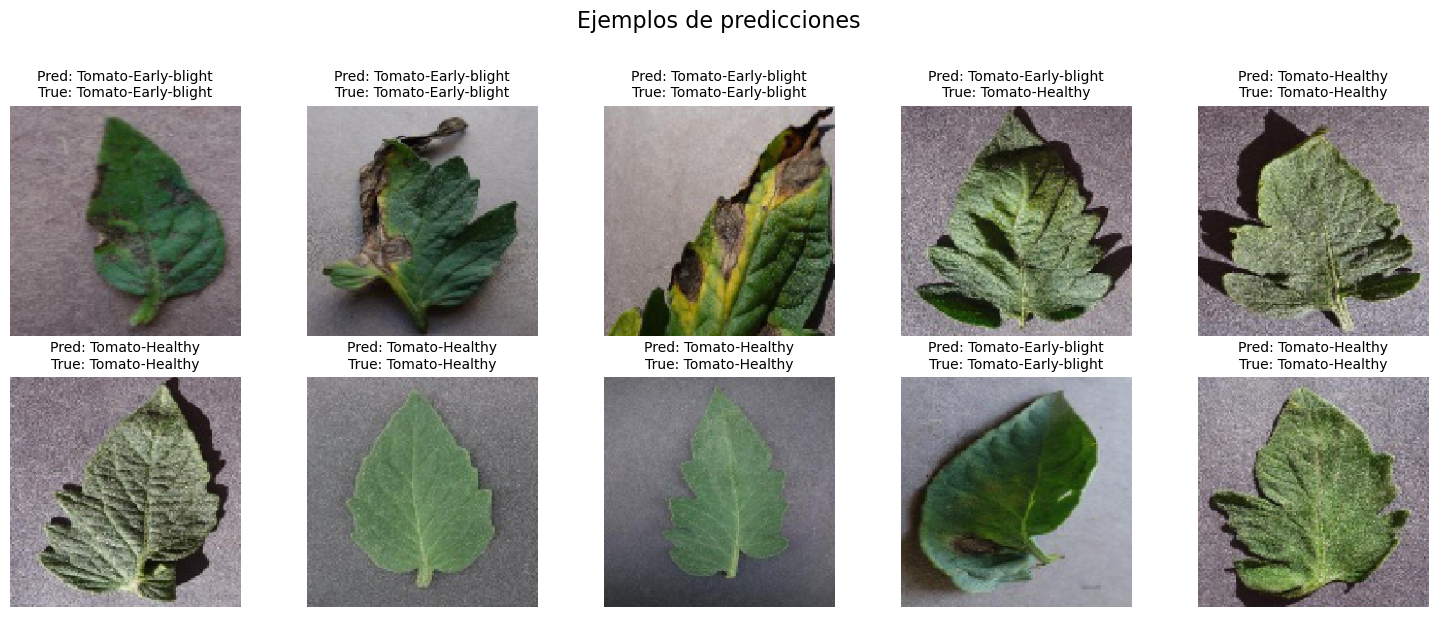

In [38]:
mostrar_ejemplos_predicciones(modelo_tl, val_gen, train_gen.class_indices, num_imagenes=10)